This notebook is for first inspection of the kaggle competition ["Google Landmark Recognition 2020"](https://www.kaggle.com/c/landmark-recognition-2020) train set.  
 

In [7]:
# imports for code 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# load the data as pandas data frame 
df = pd.read_csv("C:/Users/Matan/Desktop/projectB/data/train/train.csv") # one should change this path to his 
df

,id,landmark_id
0,17660ef415d37059,1
1,92b6290d571448f6,1
2,cd41bf948edc0340,1
3,fb09f1e98c6d2f70,1
4,25c9dfc7ea69838d,7
...,...,...
1580465,72c3b1c367e3d559,203092
1580466,7a6a2d9ea92684a6,203092
1580467,9401fad4c497e1f9,203092
1580468,aacc960c9a228b5f,203092


Some of the train set properties: 

In [10]:
print("number of ids is: {}" .format(df['id'].size))
print("\nnumber of unique values in landmark_id column is: {}" .format(df['landmark_id'].nunique()))

number of ids is: 1580470

number of unique values in landmark_id column is: 81313


As we can see, the data set composed out of **1,580,470 pictures** that divided into **81,313 classes**. 
This amount of objects and classes in the data set makes it a really challenging one. 

The train set histogram: 

<Figure size 864x576 with 0 Axes>

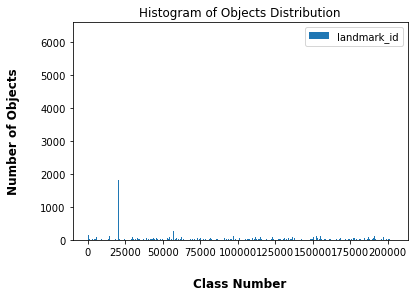

In [11]:
fig = plt.figure(figsize = (12, 8))
ax = df.plot.hist(bins=81313, grid=False, rwidth=0.9)
ax.set_xlabel("Class Number", labelpad=20, weight='bold', size=12)
ax.set_ylabel("Number of Objects", labelpad=20, weight='bold', size=12)
ax.set_title("Histogram of Objects Distribution")
plt.show()

And zoomed-in: 

<Figure size 864x576 with 0 Axes>

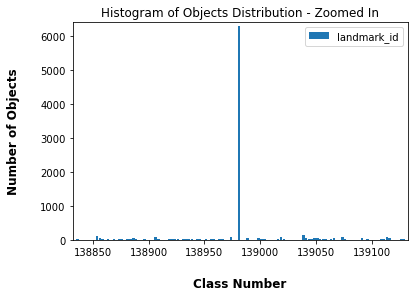

In [12]:
fig1 = plt.figure(figsize = (12, 8))
ax1 = df.plot.hist(bins=81313, grid=False, rwidth=0.9)
ax1.set_xlabel("Class Number", labelpad=20, weight='bold', size=12)
ax1.set_ylabel("Number of Objects", labelpad=20, weight='bold', size=12)
ax1.set_title('Histogram of Objects Distribution - Zoomed In') 
plt.axis([138982-150,138982+150,0,6400]) # zoomed in on the class with most items in it 
plt.show()

As we can see from the histogram plot of the train set, there are some huge variation in the number of objects in every class. 

Therfore we would like to look more carefully at the top and bottom classes in the data set. 

We'll start with the top classes: 

In [13]:
print("top 10 classes:\n")
print(df['landmark_id'].value_counts().head(10))

top 10 classes:

138982    6272
126637    2231
20409     1758
83144     1741
113209    1135
177870    1088
194914    1073
149980     971
139894     966
1924       944
Name: landmark_id, dtype: int64


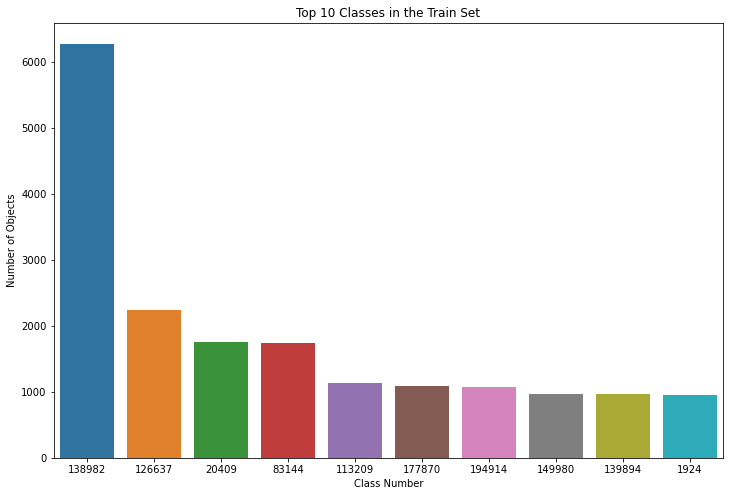

In [16]:
fig2 = plt.figure(figsize = (12,8))
sns.countplot(x=df.landmark_id, order = df['landmark_id'].value_counts().head(10).index)
plt.xlabel("Class Number")
plt.ylabel("Number of Objects")
plt.title("Top 10 Classes in the Train Set")
plt.show()

As we can see from the table and from the graph, class number 138982 is the biggest class by a big margin. It contain 6272 where none of the rest top classes contain more than 2500 objects. 

We'll look now of the top 50 classes: 

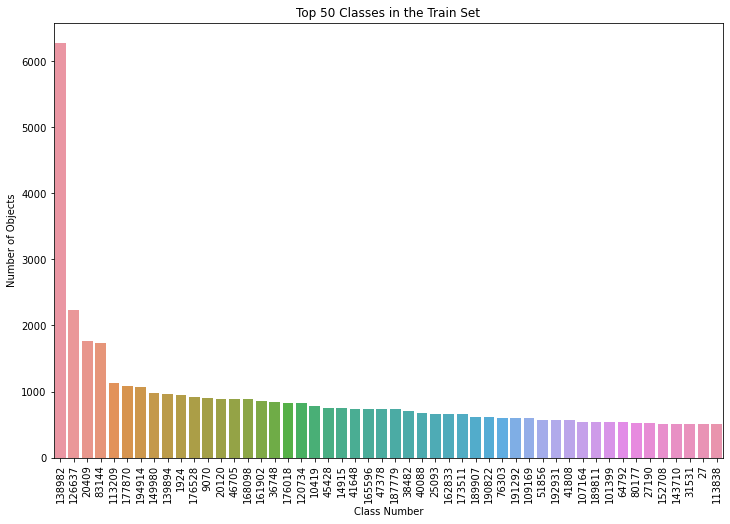

In [30]:
fig3 = plt.figure(figsize = (12,8))
sns.countplot(x=df.landmark_id, order = df['landmark_id'].value_counts().head(50).index)
plt.xlabel("Class Number")
plt.ylabel("Number of Objects")
plt.title("Top 50 Classes in the Train Set")
plt.xticks(rotation = 90)
plt.show()

This graph simulate really one of the major challanges of the given train set - the variation between classes. 

We'll look now at the bottom classes. We'll start from the bottom 10:

In [23]:
print("bottom 10 classes:\n")
print(df['landmark_id'].value_counts().tail(10))

bottom 10 classes:

110417    2
59905     2
4171      2
73532     2
195143    2
180503    2
179834    2
183115    2
63266     2
197219    2
Name: landmark_id, dtype: int64


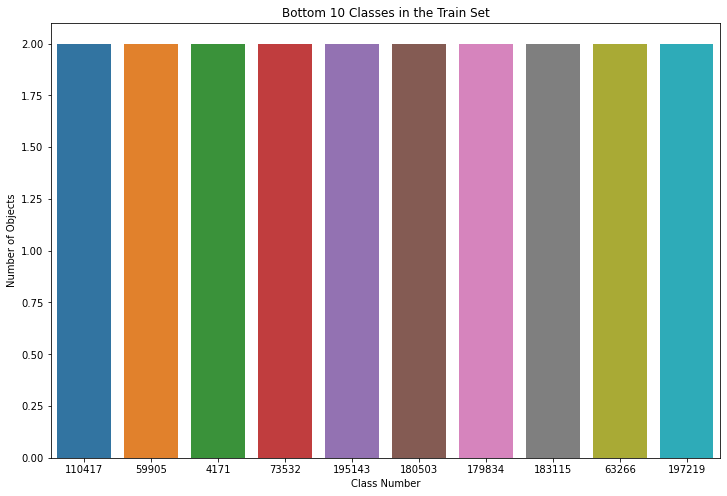

In [31]:
fig4 = plt.figure(figsize = (12,8))
sns.countplot(x=df.landmark_id, order = df['landmark_id'].value_counts().tail(10).index)
plt.xlabel("Class Number")
plt.ylabel("Number of Objects")
plt.title("Bottom 10 Classes in the Train Set")
plt.show()

As we can see all the 10 bottom classes have only 2 objects in them. 

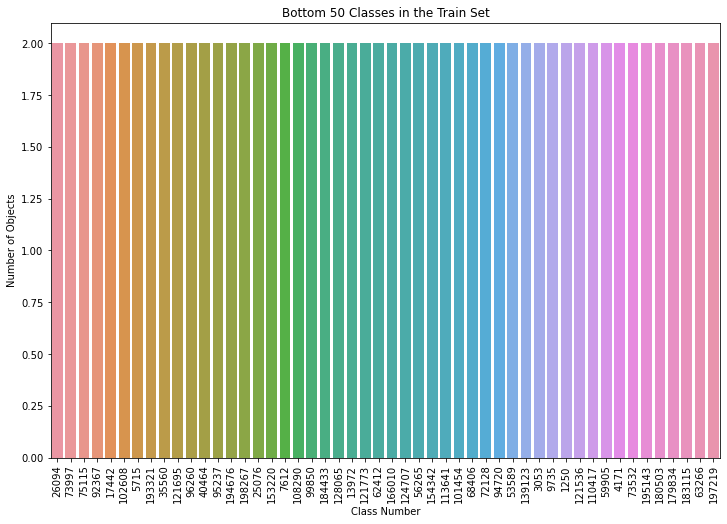

In [32]:
fig5 = plt.figure(figsize = (12,8))
sns.countplot(x=df.landmark_id, order = df['landmark_id'].value_counts().tail(50).index)
plt.xlabel("Class Number")
plt.ylabel("Number of Objects")
plt.title("Bottom 50 Classes in the Train Set")
plt.xticks(rotation = 90)
plt.show()

The 50 bottom classes, like to bottom 10, have only 2 objects in them.

As a matter of fact more than half of the classes have 9 objects or less: 

In [29]:
print(df['landmark_id'].value_counts().tail(40660)) # half of the classes is 40656.5, therfore 40660 is more than half 

74931     9
146017    9
105350    9
49287     9
70133     9
         ..
180503    2
179834    2
183115    2
63266     2
197219    2
Name: landmark_id, Length: 40660, dtype: int64


This is another major challenge of the given train set, a lot of classes have small amount of objects, this will make the training model more difficult and challenging. 